In [4]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os

In [24]:
# Function for output csv file
def data_exploration(df_combined, months_folders, output_csv_path, columns_to_select):

    # Initialize a counter to track the number of NaN values replaced
    nan_replaced_count = 0

    for month_folder in months_folders:
        # Define the path to the input CSV file
        input_csv_path = os.path.join(month_folder, 'listings.csv')
        
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(input_csv_path)
        
        # Filter the DataFrame to include only the columns that are present in the file
        columns_to_keep = [col for col in columns_to_select if col in df.columns]
        df_selected = df[columns_to_keep]
        
        # Initialize a set to store columns from other CSV files
        additional_columns = set()
        
        # Iterate over all CSV files in the folder
        for filename in os.listdir(month_folder):
            if filename.endswith('.csv') and filename != 'listings.csv':  # Check if it's a CSV file and not the original file
                file_path = os.path.join(month_folder, filename)
                other_df = pd.read_csv(file_path)

                # Iterate over each column in the other DataFrame
                for col in other_df.columns:
                    # If the column is not already in the selected DataFrame and it's in the columns_to_select list, add it
                    if col not in df_selected.columns and col in columns_to_select:
                        additional_columns.add(col)
                        # Add the column and its data to the selected DataFrame
                        df_selected[col] = other_df[col]

                    elif  col in df_selected.columns and col in columns_to_select:
                        # Check if any value in the selected DataFrame for this column is NaN
                        nan_mask = df_selected[col].isna()
                        
                        # Check if the corresponding value in the other DataFrame is not NaN
                        non_nan_mask = ~other_df[col].isna()
                        
                        # Update the selected DataFrame where NaN values are found
                        df_selected.loc[nan_mask & non_nan_mask, col] = other_df.loc[nan_mask & non_nan_mask, col]
                        # print(f"NaN values in column '{col}' replaced with non-NaN values.")

                        # Count the number of NaN values replaced
                        nan_replaced_count += sum(nan_mask & non_nan_mask)

        # Concatenate the current month's DataFrame with the overall concatenated DataFrame
        df_combined = pd.concat([df_combined, df_selected], ignore_index=True)

    # Write the concatenated DataFrame to the output CSV file
    df_combined.to_csv(output_csv_path, index=False)

    print(f"Data from all months has been written to {output_csv_path}")
    print(f"The output CSV file has {df_selected.shape[1]} columns.")
    # Print the columns that have been added to the output file
    # print("Columns added to the output file:")
    # for col in df_selected.columns:
    #    print(col)

    # Print the number of NaN values replaced
    print(f"Number of NaN values replaced: {nan_replaced_count}")

    return df_combined

# Initialize an empty DataFrame to store the concatenated data for 2019
df_combined_2019 = pd.DataFrame()

# Initialize an empty DataFrame to store the concatenated data for 2023
df_combined_2023 = pd.DataFrame()

# Define the columns you want to select
columns_to_select_2019 = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
                        'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
                        'host_response_rate','host_identity_verified', 'host_has_profile_pic', 'first_review', 'description','city',
                        'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
                        'property_type', 'price', 'availability_365', 'minimum_nights', 'last_scraped']

# Define the columns you want to select
columns_to_select_2023 = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
                        'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
                        'host_response_rate','host_identity_verified', 'host_has_profile_pic', 'first_review', 'description','city',
                        'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
                        'property_type', 'price', 'availability_365', 'minimum_nights', 'last_scraped']

### 2019 ###

# Iterate over each month's folder
months_folders = ['data/2019/april', 'data/2019/febrouary', 'data/2019/march']

# Define the path to the output CSV file
output_csv_path_2019 = 'data_train/train_2019.csv'

df_combined_2019 = data_exploration(df_combined_2019, months_folders, output_csv_path_2019, columns_to_select_2019)

### 2023 ###

# Iterate over each month's folder
months_folders = ['data/2023/june', 'data/2023/march', 'data/2023/september']

# Define the path to the output CSV file
output_csv_path_2023 = 'data_train/train_2023.csv'

df_combined_2023 = data_exploration(df_combined_2023, months_folders, output_csv_path_2023, columns_to_select_2023)
df_combined_2023.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\657115455.py:12: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)
C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\657115455.py:12: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)
C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\657115455.py:12: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)


Data from all months has been written to data_train/train_2019.csv
The output CSV file has 31 columns.
Number of NaN values replaced: 261
Data from all months has been written to data_train/train_2023.csv
The output CSV file has 26 columns.
Number of NaN values replaced: 4111


In [32]:
# data cleaning 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def cleaning_data(df, output_csv_path):
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'Plaka')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'Attiki')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'Exarcheia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ','Agios Konstantinos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΥΨΕΛΗ', 'Kypseli')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΑΓΚΡΑΤΙ', 'Pangrati')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΝΕΟΣ ΚΟΣΜΟΣ', 'Neos Kosmos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΛΩΝΑΚΙ', 'Kolonaki')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΜΠΕΛΟΚΗΠΟΙ', 'Ambelokipi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'Koukaki')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΕΡΑΜΕΙΚΟΣ', 'Kerameikos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΣΤΑΔΙΟ', 'Stadio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΚΡΟΠΟΛΗ', 'Akropoli')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΛΥΚΑΒΗΤΤΟΣ', 'Lykavittos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΕΝΤΑΓΩΝΟ', 'Pedagono')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'Akadimia Platonos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΘΗΣΕΙΟ', 'Thiseio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΟΥΒΑ', 'Gouva')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΟΥΔΙ', 'Goudi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΕΔΙΟ ΑΡΕΩΣ', 'Pedion Areos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΝΩ ΠΑΤΗΣΙΑ', 'Patisia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΛΩΝΟΣ', 'Kolonos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΝΙΡΒΑΝΑ', 'Nirvana')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΕΛΛΗΝΟΡΩΣΩΝ', 'Ellinoroson')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΙΛΙΣΙΑ', 'Ilisia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΖΑΠΠΕΙΟ', 'Zappeio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΚΥΖΗ', 'Gizi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΒΟΤΑΝΙΚΟΣ', 'Votanikos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'Agios Nikolaos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΕΤΡΑΛΩΝΑ', 'Petralona')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΚΑΖΙ', 'Gazi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('1Ο ΝΕΚΡΟΤΑΦΕΙΟ', '1o Nekrotafio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΑΤΗΣΙΑ', 'Patisia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΡΟΜΠΟΝΑ', 'Probona')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΟΛΥΓΩΝΟ', 'Poligono')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ','Agios Eleftherios')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'Plateia Amerikis')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΛΟΚΥΝΘΟΥ', 'Kolokinthou')
    
    # specifically for 2023
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΝΩ ', '')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'Stathmos Larisis')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΝΕΑ ', '')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΣΕΠΟΛΙΑ', 'Sepolia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΡΙΖΟΥΠΟΛΗ', 'Rizoupoli')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΡΗΓΙΛΛΗΣ', 'Rigilis')


    df.to_csv(output_csv_path, index=False)

cleaning_data(df_combined_2019, output_csv_path_2019)

cleaning_data(df_combined_2023, output_csv_path_2023)

neighborhood_counts = df_combined_2023['neighbourhood'].value_counts()
print(neighborhood_counts)

neighbourhood
Plaka                 6981
Koukaki               3203
Exarcheia             2758
Neos Kosmos           2743
Agios Konstantinos    2289
Attiki                1626
Pangrati              1437
Kypseli               1270
Ambelokipi            1237
Kolonaki              1212
Akropoli              1100
Thiseio               1093
Petralona             1021
Kerameikos             994
Stadio                 717
Patisia                670
Goudi                  654
Ilisia                 614
Plateia Amerikis       478
Zappeio                474
Lykavittos             459
Nirvana                455
Gazi                   315
Gizi                   314
Kolonos                303
Pedion Areos           299
Stathmos Larisis       254
Agios Nikolaos         252
Votanikos              224
Akadimia Platonos      212
Gouva                  209
Ellinoroson            207
1o Nekrotafio          151
Sepolia                126
Agios Eleftherios       99
Poligono                78
Kolokinthou   

In [5]:
# Define the list of file paths with directory prefix
file_paths = ['data/2019/april/listings.csv', 'data/2019/april/listings0.csv',
               'data/2019/april/reviews.csv', ]

# Define the columns to check (excluding 'id')
columns_to_check = ['price', 'minimum_nights', 'zipcode', 'transit', 'cancellation_policy', 'bedrooms', 'beds',
                    'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
                    'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified',
                    'host_has_profile_pic', 'first_review', 'description', 'city', 'bed_type', 'bathrooms',
                    'accommodates', 'amenities', 'room_type', 'property_type', 'availability_365']

# Read the data from each file into a dictionary of DataFrames
dfs = {}
for file_path in file_paths:
    df_name = file_path.split('/')[-1].split('.')[0]  # Extracting DataFrame name from file path
    dfs[df_name] = pd.read_csv(file_path)

# Initialize a list to store inconsistencies
inconsistencies = []

# Helper function to normalize value for comparison
def normalize_value(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading/trailing whitespaces for strings
        if value.startswith('$'):
            value = value[1:]  # Remove leading currency symbol
        if '.' in value:
            value = value.rstrip('0').rstrip('.')  # Remove trailing zeros and decimal point
        return value
    elif isinstance(value, float):
        return round(value, 2)  # Round float values to 2 decimal places
    else:
        return value  # Return other types unchanged

# Iterate over the 'id' column in the 'listings.csv' DataFrame
for idx, row in dfs['listings'].iterrows():
    listing_id = row['id']  # Get the id from 'listings.csv'
    # Iterate over other DataFrames to check corresponding values for this id
    for df_name, df in dfs.items():
        if df_name != 'listings':  # Exclude 'listings.csv' itself
            # Check if the id exists in the current DataFrame
            if 'id' in df.columns and listing_id in df['id'].values:
                # Get the row with the matching id
                matching_row = df[df['id'] == listing_id].iloc[0]
                # Compare values of columns_to_check
                for column in columns_to_check:
                    if column in row and column in matching_row:
                        value1 = normalize_value(row[column])
                        value2 = normalize_value(matching_row[column])
                        if value1 != value2:
                            # Append the inconsistency to the list
                            inconsistencies.append((listing_id, column, df_name, value1, value2))

# Print any inconsistencies found
if inconsistencies:
    print("Inconsistencies found:")
    for inconsistency in inconsistencies:
        print(f"ID: {inconsistency[0]}, Column: {inconsistency[1]}, File: {inconsistency[2]}")
        print(f"  Value in listings.csv: {inconsistency[3]}")
        print(f"  Value in {inconsistency[2]}: {inconsistency[4]}")
else:
    print("No inconsistencies found.")


C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_20620\3042136293.py:16: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[df_name] = pd.read_csv(file_path)


Inconsistencies found:
ID: 10595, Column: price, File: listings0
  Value in listings.csv: 73
  Value in listings0: 73
ID: 10595, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10988, Column: price, File: listings0
  Value in listings.csv: 82
  Value in listings0: 82
ID: 10988, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10990, Column: price, File: listings0
  Value in listings.csv: 49
  Value in listings0: 49
ID: 10990, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10993, Column: price, File: listings0
  Value in listings.csv: 38
  Value in listings0: 38
ID: 10993, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10995, Column: price, File: listings0
  Value in listings.csv: 49
  Value in listings0: 49
ID: 10995, Column: nei

In [26]:
# Question 1.1

# Function that returns the most common room type of a year
def most_common_room_type(df_combined):
    result = df_combined['room_type'].value_counts().idxmax()
    return result

# Year 2019
room_type = most_common_room_type(df_combined_2019)
print("For 2019 the most common room type is:")
print(room_type)

# Year 2023
room_type = most_common_room_type(df_combined_2023)
print("\nFor 2023 the most common room type is:")
print(room_type)

For 2019 the most common room type is:
Entire home/apt

For 2023 the most common room type is:
Entire home/apt


For 2019 the average price over 3 months is


C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\2355812395.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_price = df_combined.groupby('month')['price'].mean()


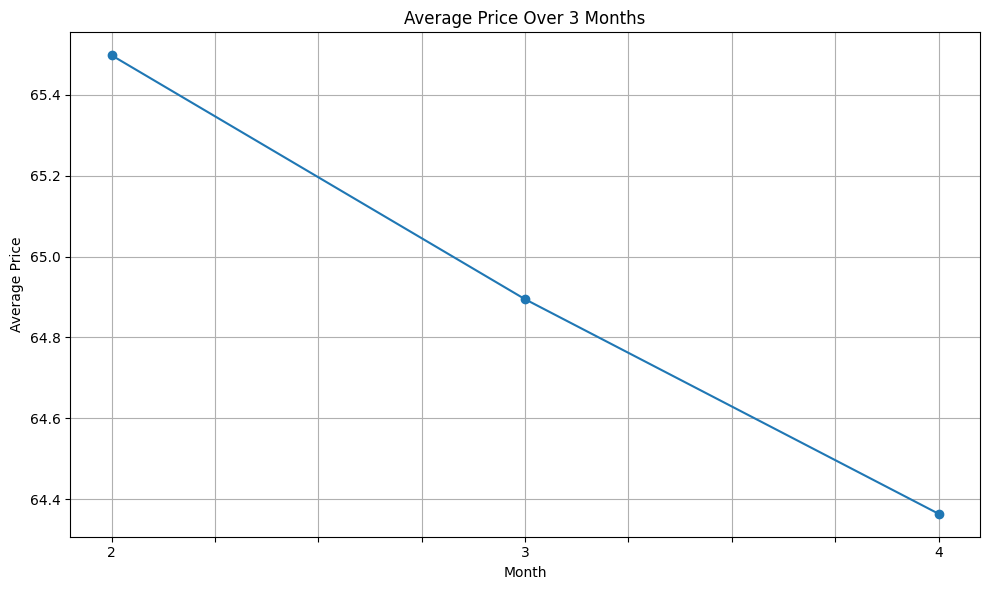


For 2023 the average price over 3 months is:


C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\2355812395.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_price = df_combined.groupby('month')['price'].mean()


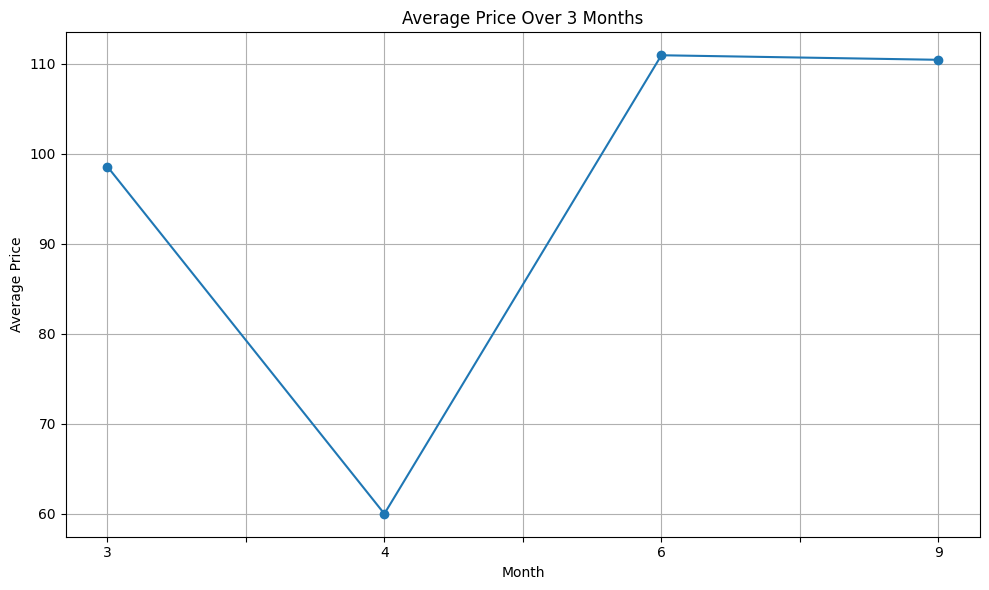

In [27]:
# Question 1.2

def average_price(df_combined, output_csv_path):
    df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

    # Extract month from date
    df_combined['month'] = df_combined['last_scraped'].dt.month.astype('category')
    # Clean the 'price' column by removing commas and dollar signs
    df_combined['price'] = df_combined['price'].astype(str).str.replace(',', '').str.replace('$', '')

    # Convert the 'price' column to float
    df_combined['price'] = df_combined['price'].astype(float)
    # Continue with the previous steps to calculate the monthly average price

    # Group by month and calculate average price
    monthly_avg_price = df_combined.groupby('month')['price'].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    monthly_avg_price.plot(marker='o', linestyle='-')

    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.title('Average Price Over 3 Months')

    # Show grid
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

    df_combined.to_csv(output_csv_path, index=False)

# Year 2019
print("For 2019 the average price over 3 months is")
average_price(df_combined_2019, output_csv_path_2019)

# Year 2023
print("\nFor 2023 the average price over 3 months is:")
average_price(df_combined_2023, output_csv_path_2023)

In [28]:
# Question 1.3

# xazo to na katharisoume ta (Athens, Attiki, Greece),(Athens, Attika, Greece) ή (Athina, Attika), (Αθήνα, Attikhs) AFOU 
# DEN EINAI GEITONIES RE PANAGIOTAKI KAI DEN TA EXOUME AUTA GTXM
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

def top_neighbourhoods(df_combined):
    neighbourhood_reviews = df_combined.groupby('neighbourhood')['number_of_reviews'].sum()

    neighbourhood_reviews_sorted = neighbourhood_reviews.sort_values(ascending=False)

    # Select the top 5 neighbourhoods
    top_5_neighbourhoods = neighbourhood_reviews_sorted.head()

    # Print the result
    print(top_5_neighbourhoods)

# Year 2019
print("Top 5 neighbourhoods for the year 2019:")
top_neighbourhoods(df_combined_2019)

# Year 2023
print("\nTop 5 neighbourhoods for the year 2023:")
top_neighbourhoods(df_combined_2023)



Top 5 neighbourhoods for the year 2019:
neighbourhood
Plaka           132361
Koukaki          90357
Neos Kosmos      83348
Psyri            54353
Metaxourgeio     44792
Name: number_of_reviews, dtype: int64

Top 5 neighbourhoods for the year 2023:
neighbourhood
Plaka                 433513
Koukaki               207147
Neos Kosmos           129434
Exarcheia             103904
Agios Konstantinos    102836
Name: number_of_reviews, dtype: int64


In [29]:
# Question 1.4

def find_neighbourhood(df_combined):

    temp_df = df_combined.copy()
    temp_df['last_scraped'] = pd.to_datetime(temp_df['last_scraped'])

    # Extract month from date
    temp_df['month'] = temp_df['last_scraped'].dt.month.astype('float')

    temp_df.drop_duplicates(subset=['id'], inplace = True)
    properties = temp_df.groupby(['neighbourhood','month'])['id'].count()

    neighborhood_total_counts = properties.groupby('neighbourhood').sum()

    max_property = neighborhood_total_counts.idxmax()
    max_number = neighborhood_total_counts.max()
    print(max_property,max_number)
    # number_of_properties = properties.value_counts().idxmax()

# Year 2019
print("The neighbourhood with the most properties for 2019:")
find_neighbourhood(df_combined_2019)

# Year 2023
print("\nThe neighbourhood with the most properties for 2023:")
find_neighbourhood(df_combined_2023)

The neighbourhood with the most properties for 2019:
Plaka 1169

The neighbourhood with the most properties for 2023:
Plaka 2647


In [30]:
# Question 1.5

def find_registrations(df_combined):

    temp_df = df_combined.copy()
    temp_df['last_scraped'] = pd.to_datetime(temp_df['last_scraped'])

    # Extract month from date
    temp_df['month'] = temp_df['last_scraped'].dt.month.astype('float')

    temp_df.drop_duplicates(subset=['id'], inplace = True)
    neighborhood_month_counts = temp_df.groupby(['neighbourhood', 'month'])['id'].count()
    neighborhood_total_counts = neighborhood_month_counts.groupby('neighbourhood').sum()
    #kataxoriseis ana geitonia(diaforetikes mallon?)
    print(neighborhood_total_counts)

    neighborhood_month_id_counts = df_combined.groupby('month')['id'].count()

    print(neighborhood_month_id_counts)

# Year 2019
print("Registrations for 2019:")
find_registrations(df_combined_2019)

# Year 2023
print("\nRegistrations for 2023:")
find_registrations(df_combined_2023)

Registrations for 2019:
neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                         1
Agios Loukas                          80
Agios Nikolaos                       223
Akadimia Platonos                     49
Ambelokipi                           566
Attiki                               284
Exarcheia                            519
Gazi                                  69
Goudi                                 34
Ilisia                               192
Kerameikos                           362
Kolonaki                             642
Kolonos                              132
Koukaki                              847
Kypseli                              323
Larissis                             584
Metaxourgeio                         563
Mets                                 289
Monastiraki                           33
Neapoli                              228
Neos Kosmos                          872
Pangrati                             655
Patisia                              245
Pedion Areos       

C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\226372363.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighborhood_month_id_counts = df_combined.groupby('month')['id'].count()
C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_21312\226372363.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighborhood_month_id_counts = df_combined.groupby('month')['id'].count()


Graph of 2019


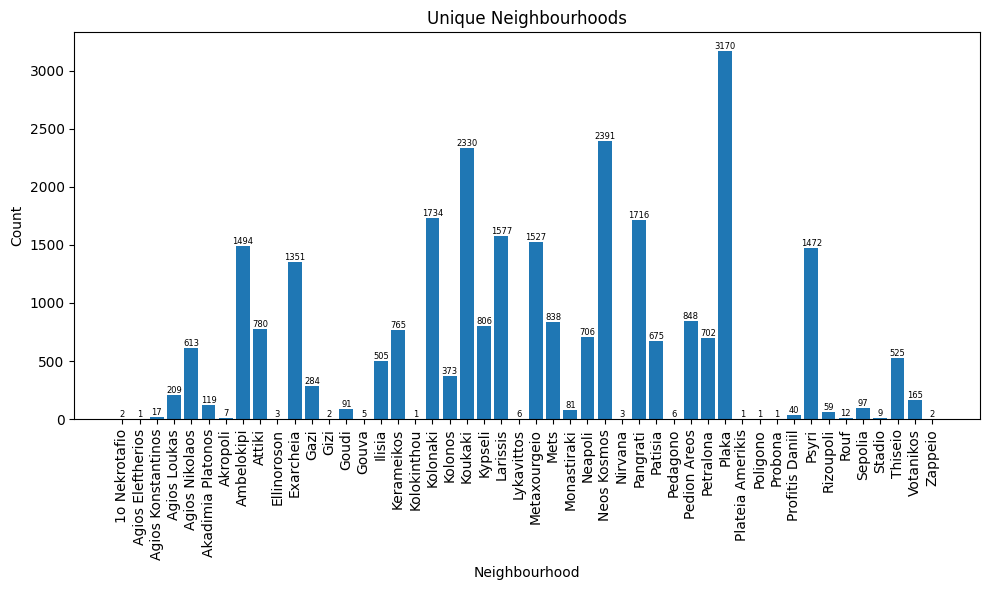


Graph of 2023


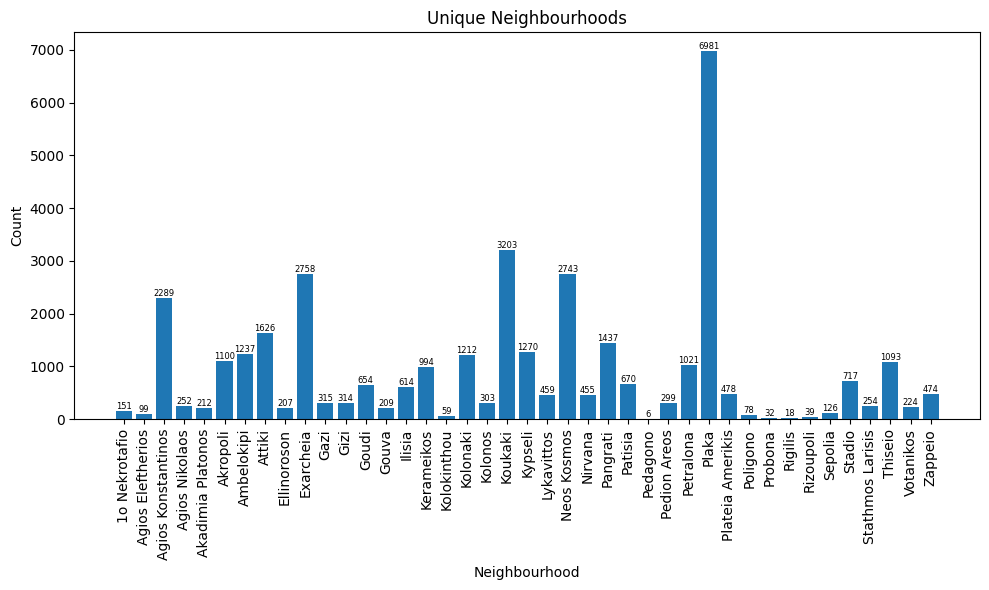

In [37]:
# Question 1.6
# Group the data by 'neighbourhood' and 'month' and count the number of unique neighborhoods
# unique_neighborhoods = df_combined.groupby(['neighbourhood', 'month'])['id'].size()
# unique_neighborhoods
# thelw na pethano den kanw plaka

def mk_graph(df_combined):
    df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

    # Extract month from date
    df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

    properties = df_combined.groupby(['neighbourhood','month'])['id'].nunique()

    neighborhood_total_counts = properties.groupby('neighbourhood').sum()
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(neighborhood_total_counts.index.get_level_values('neighbourhood'), neighborhood_total_counts)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set labels and title
    plt.xlabel('Neighbourhood')
    plt.ylabel('Count')
    plt.title('Unique Neighbourhoods')

    for i, count in enumerate(neighborhood_total_counts):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=6)

    # Show the plot
    plt.tight_layout()
    plt.show()

# 2019
print("Graph of 2019")
mk_graph(df_combined_2019)

# 2023
print("\nGraph of 2023")
mk_graph(df_combined_2023)

In [33]:
# Question 1.7
## NOMIZO META THA THELEI KAPOS NA EPANAFEREIS TA DIPLA STO DF ISOS KSANADIABAZONTAS TO ARXEIO KAI PERNONTAS TO STO IDIO df_combined

def find_roomtypes(df_combined):

    df_combined.drop_duplicates(subset=['id'])
    room_type_counts = df_combined.groupby('neighbourhood')['room_type'].value_counts()


    most_common_room_type = room_type_counts.groupby('neighbourhood').nlargest(1).reset_index(level=1, drop=True)
    # result = room_type_counts.groupby('neighbourhood').idxmax()
    # result = result.reset_index(level = 0, drop = True)
    # print(result)
    print(most_common_room_type)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Year 2019
print("Year 2019:")
find_roomtypes(df_combined_2019)

# Year 2023
print("\nYear 2023")
find_roomtypes(df_combined_2023)

Year 2019:
neighbourhood                     room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt       2
Agios Loukas                      Entire home/apt     177
Agios Nikolaos                    Entire home/apt     524
Akadimia Platonos                 Entire home/apt      92
Ambelokipi                        Entire home/apt    1386
Attiki                            Entire home/apt     647
Exarcheia                         Entire home/apt    1171
Gazi                              Entire home/apt     240
Goudi                             Entire home/apt      63
Ilisia                            Entire home/apt     473
Kerameikos                        Entire home/apt     682
Kolonaki                          Entire home/apt    1615
Kolonos                           Entire home/apt     321
Koukaki                           Entire home/apt    2104
Kypseli                           Entire home/apt     645
Larissis                          Entire home/apt    1276
Metaxourgei

In [34]:
# Question 1.8

def find_most_expensive_roomtype(data):
    df_combined = pd.DataFrame(data)

    most_expensive = df_combined.groupby('room_type')['price'].value_counts()
    most_expensive_type = most_expensive.groupby('room_type').sum()

    result0 = 0
    result1 = 0
    result2 = 0


    for price_count  in most_expensive.items():
        if price_count[0][0] == 'Entire home/apt':
            result0 = result0 +  price_count[0][1] * price_count[1]

        if price_count[0][0] == 'Shared room':
            result1 = result1 +  price_count[0][1] * price_count[1]
        
        if price_count[0][0] == 'Private room':
            result2 = result2 +  price_count[0][1] * price_count[1]

    if result0 > result1:
        if result0 > result2:
            print('Entire home/apt',result0,'$')
        elif result0 < result2:
            print('Private room',result2,'$')
    elif result1 > result0:
        print('Shared room',result1,'$')
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 2019
print("The most expensive room type for 2019:")
new_file_path = 'data_train/train_2019.csv'
data_from_2019 = pd.read_csv(new_file_path)
find_most_expensive_roomtype(data_from_2019)

# 2023
print("The most expensive room type for 2023:")
new_file_path = 'data_train/train_2023.csv'
data_from_2023 = pd.read_csv(new_file_path)
find_most_expensive_roomtype(data_from_2023)

The most expensive room type for 2019:
Entire home/apt 1561879.0 $
The most expensive room type for 2023:
Entire home/apt 3448772.0 $
